In [9]:
# Import required libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from pathlib import Path
import matplotlib.pyplot as plt

# Enable inline plotting for Jupyter
%matplotlib inline



In [10]:
# Define the root directory
project_root = Path.cwd().parent  # Adjust based on your folder structure

# Load preprocessed datasets
train_data = pd.read_csv(project_root / "data" / "preprocessed_train.csv")
test_data = pd.read_csv(project_root / "data" / "preprocessed_test.csv")

# Verify the data
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

# Preview datasets
print("Train Data Head:\n", train_data.head())
print("\nTest Data Head:\n", test_data.head())


Train Data Shape: (891, 15)
Test Data Shape: (418, 14)
Train Data Head:
    Survived  Pclass       Age  SibSp  Parch      Fare  Age_Missing  \
0         0       2 -0.565736      1      0 -0.502445            0   
1         1       0  0.663861      1      0  0.786845            0   
2         1       2 -0.258337      0      0 -0.488854            0   
3         1       0  0.433312      1      0  0.420730            0   
4         0       2  0.433312      0      0 -0.486337            0   

   Cabin_Deck  Cabin_Missing  Embarked_Q  Embarked_S  Sex_male  Family_Size  \
0          -1              1           0           1         1            2   
1           2              0           0           0         0            2   
2          -1              1           0           1         0            1   
3           2              0           0           1         0            2   
4          -1              1           0           1         1            1   

   Is_Alone  Fare_Per_Person  


In [11]:
# Define features (X) and target (y)
X = train_data.drop('Survived', axis=1)  # Features
y = train_data['Survived']  # Target variable

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the splits
print(f"X_train Shape: {X_train.shape}, X_val Shape: {X_val.shape}")
print(f"y_train Shape: {y_train.shape}, y_val Shape: {y_val.shape}")



X_train Shape: (712, 14), X_val Shape: (179, 14)
y_train Shape: (712,), y_val Shape: (179,)


In [12]:
# Initialize individual models
log_reg = LogisticRegression(random_state=42)
rand_forest = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10)
grad_boost = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1)

# List of models
estimators = [
    ('Logistic Regression', log_reg),
    ('Random Forest', rand_forest),
    ('Gradient Boosting', grad_boost)
]


In [13]:
# Initialize the Voting Classifier
voting_clf = VotingClassifier(estimators=estimators, voting='soft')


Ensemble Model Accuracy: 0.8268

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



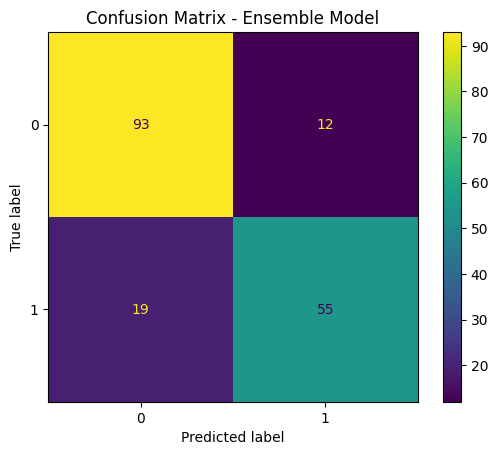

In [14]:
# Fit the Voting Classifier
voting_clf.fit(X_train, y_train)

# Predict on the validation set
y_pred_ensemble = voting_clf.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred_ensemble)
print(f"Ensemble Model Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_val, y_pred_ensemble))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred_ensemble)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=voting_clf.classes_).plot()
plt.title("Confusion Matrix - Ensemble Model")
plt.show()


In [15]:
# Compare individual model performance
for name, model in estimators:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.7989
Random Forest Accuracy: 0.8101
Gradient Boosting Accuracy: 0.8324


In [16]:
# Predict on the test dataset
test_predictions = voting_clf.predict(test_data)

# Reload the original test data to retrieve PassengerId
original_test_data = pd.read_csv(project_root / "data" / "test.csv")

# Create the submission DataFrame
submission = pd.DataFrame({
    'PassengerId': original_test_data['PassengerId'],
    'Survived': test_predictions
})

# Save the submission file
submission_file = project_root / "submission_ensemble.csv"
submission.to_csv(submission_file, index=False)

print(f"Ensemble submission file saved at: {submission_file}")


Ensemble submission file saved at: c:\Users\thomas.hunter\Documents\Python\kaggle_titanic\submission_ensemble.csv
